In [1]:
#!rm -R "/content/drive/MyDrive/UTKFace/UTKFace"

In [2]:
#!tar -xvf "/content/drive/MyDrive/UTKface_Aligned&cropped/UTKFace.tar.gz" -C "/content/drive/MyDrive/UTKFace"

In [3]:
import os
onlyfiles = os.listdir('/content/drive/MyDrive/UTKFace/UTKFace')
len(onlyfiles)

23708

In [53]:
# importing required libraries

import numpy as np
import os
import cv2
from tensorflow import keras
import matplotlib.pyplot as plt
import seaborn as sns
from random import shuffle
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Activation, Dropout, Flatten, Dense

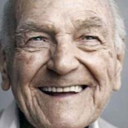

In [5]:
#Checking images loaded or not
from PIL import Image
Image.open('/content/drive/MyDrive/UTKFace/UTKFace/100_0_0_20170112215240346.jpg.chip.jpg').resize((128,128))

In [6]:
os.getcwd()

'/content/drive/MyDrive/UTKFace/UTKFace'

In [9]:
shuffle(onlyfiles)
gender = [i.split('_')[1] for i in onlyfiles]

In [10]:
# Spliting data into gender classes 0- Male, 1-Female
classes = []
for i in gender:
  i = int(i)
  classes.append(i)

In [14]:
# Converting images to vectors
from PIL import Image
import PIL
import imageio
import cv2
X_data = []
for file in onlyfiles:
  face = imageio.imread(file)
  face = cv2.resize(face, (32,32))
  X_data.append(face)

In [15]:
X = np.squeeze(X_data)
X.shape

(23708, 32, 32, 3)

In [16]:
X = X.astype('float32')
X /= 255

In [17]:
classes[:10]

[1, 0, 0, 1, 1, 1, 1, 1, 0, 0]

In [19]:
categorical_labels = tf.keras.utils.to_categorical(classes, num_classes=2)

In [20]:
categorical_labels[:10]

array([[0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.]], dtype=float32)

In [21]:
(x_train, y_train), (x_test, y_test) = (X[:15008], categorical_labels[:15008]), (X[15008:], categorical_labels[15008:])
(x_valid, y_valid) = (x_test[:7000], y_test[:7000])
(x_test, y_test) = (x_test[7000:], y_test[7000:])

In [22]:
len(x_train) + len(x_test) + len(x_valid) == len(X) 

True

In [47]:
model = Sequential()
# Layer 1
model.add(Conv2D(64,(5,5),activation='relu', input_shape=(32,32,3))) #64 neurons with 5*5 filter, relu activation function
#This class allows to create convolutional neural network to extract feature from the images
model.add(MaxPooling2D(pool_size=(2, 2))) #MaxPooling2D helps to reduce the size of the data
model.add(Dropout(0.3))


#Layer 2
model.add(Conv2D(32,(5,5), activation='relu')) # 32 neurons with 5*5 filter, relu activation function
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.3))


#Layer 3
model.add(Flatten()) # Converts multi dimensional array to 1D channel
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(2, activation='sigmoid')) # output layer, sigmoig activation function

model.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_21 (Conv2D)           (None, 28, 28, 64)        4864      
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 14, 14, 64)        0         
_________________________________________________________________
dropout_10 (Dropout)         (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_22 (Conv2D)           (None, 10, 10, 32)        51232     
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 5, 5, 32)          0         
_________________________________________________________________
dropout_11 (Dropout)         (None, 5, 5, 32)          0         
_________________________________________________________________
flatten_5 (Flatten)          (None, 800)              

In [48]:
opt = keras.optimizers.Adam(learning_rate=0.001)
model.compile(loss='binary_crossentropy',
              optimizer= opt,
              metrics=['accuracy'])

In [49]:
model.fit(x_train,
          y_train,
          batch_size=64,
          epochs=35,
          validation_data =(x_valid, y_valid))

Epoch 1/35
235/235 [==============================] - 5s 14ms/step - loss: 0.6435 - accuracy: 0.6220 - val_loss: 0.4372 - val_accuracy: 0.8053
Epoch 2/35
235/235 [==============================] - 3s 11ms/step - loss: 0.4387 - accuracy: 0.8002 - val_loss: 0.3762 - val_accuracy: 0.8286
Epoch 3/35
235/235 [==============================] - 3s 11ms/step - loss: 0.3834 - accuracy: 0.8279 - val_loss: 0.3307 - val_accuracy: 0.8524
Epoch 4/35
235/235 [==============================] - 3s 11ms/step - loss: 0.3596 - accuracy: 0.8385 - val_loss: 0.3138 - val_accuracy: 0.8614
Epoch 5/35
235/235 [==============================] - 3s 11ms/step - loss: 0.3439 - accuracy: 0.8420 - val_loss: 0.3101 - val_accuracy: 0.8669
Epoch 6/35
235/235 [==============================] - 3s 11ms/step - loss: 0.3488 - accuracy: 0.8390 - val_loss: 0.3120 - val_accuracy: 0.8681
Epoch 7/35
235/235 [==============================] - 3s 11ms/step - loss: 0.3200 - accuracy: 0.8562 - val_loss: 0.3052 - val_accuracy: 0.8674

In [50]:
# Evaluate the model on test set
score = model.evaluate(x_test, y_test, verbose=0)
print('\n', 'Test accuracy;', score[1])


 Test accuracy; 0.8905882239341736


In [52]:
labels = ["Male",
          "Female",
          ]

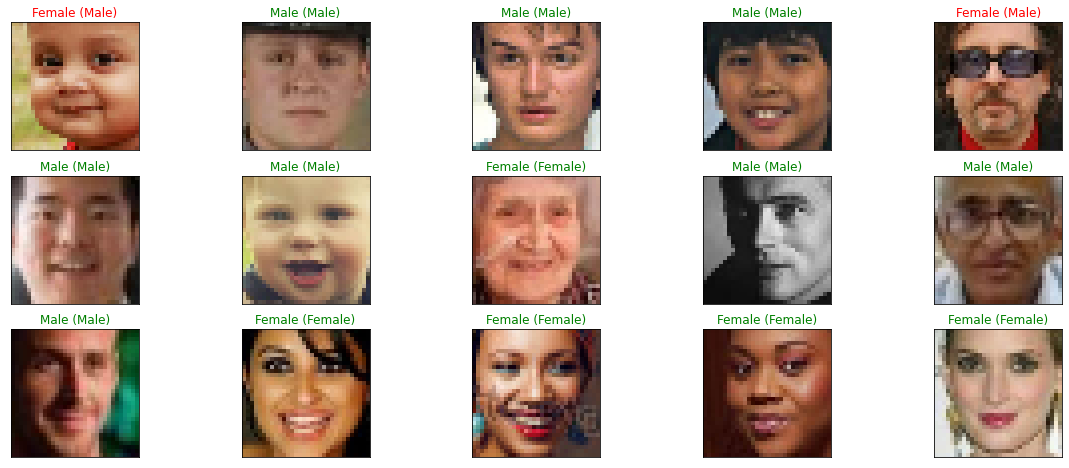

In [55]:
y_hat = model.predict(x_test)

figure = plt.figure(figsize=(20,8))
for i, index in enumerate(np.random.choice(x_test.shape[0], size=15, replace=False)):
  ax = figure.add_subplot(3,5, i+1, xticks=[], yticks=[])
  # Display each image
  ax.imshow(np.squeeze(x_test[index]))
  predict_index = np.argmax(y_hat[index])
  true_index = np.argmax(y_test[index])
  # Set the title for each image
  ax.set_title("{} ({})".format(labels[predict_index],labels[true_index]), color =('green' if predict_index == true_index else 'red'))
plt.show()